In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
def convert_label(value_map):
    def mapper(label):
        if label in value_map:
            return value_map[label]
        else:
            return label
    return mapper

In [4]:
# Load the data into a pandas DataFrame
df = pd.read_excel('az10.xlsx')


df["litho"] = df["litho"].apply(convert_label({'LIMESTONE': 0, 'MIX': 1,'SANDSTONE':2,'DOLOMITE':4, 'ANHYDRIDE':5, 'SHALE':6}))
df = df.drop('Well ID', axis=1)
df = df.drop('X', axis=1)
df = df.drop('VOL_QUARTZ', axis=1)
df = df.drop('Y', axis=1)
# df = df.drop('Un', axis=1)
df.head()


,DEPTH,CALI,DT,NPHI,PHIE,RHOB,SW,litho,VANH,VCLC,VDOL,VOL_SHALE,Un
0,2555.1384,5.7268,61.7078,0.1010,0.1201,2.5714,0.3912,0,0.1401,0.6317,0.1080,0.0,-999.25
1,2555.2908,5.7468,65.2759,0.1378,0.1480,2.5083,0.2880,0,0.0288,0.5921,0.2312,0.0,-999.25
2,2555.4432,5.8124,68.7534,0.1657,0.1730,2.4661,0.2421,0,0.0346,0.5207,0.2717,0.0,-999.25
3,2555.5956,5.8405,70.1109,0.1981,0.1984,2.4371,0.2994,1,0.0034,0.3592,0.4391,0.0,-999.25
4,2555.7480,5.7661,73.7412,0.2272,0.2284,2.4057,0.3439,4,0.0001,0.2274,0.5441,0.0,-999.25


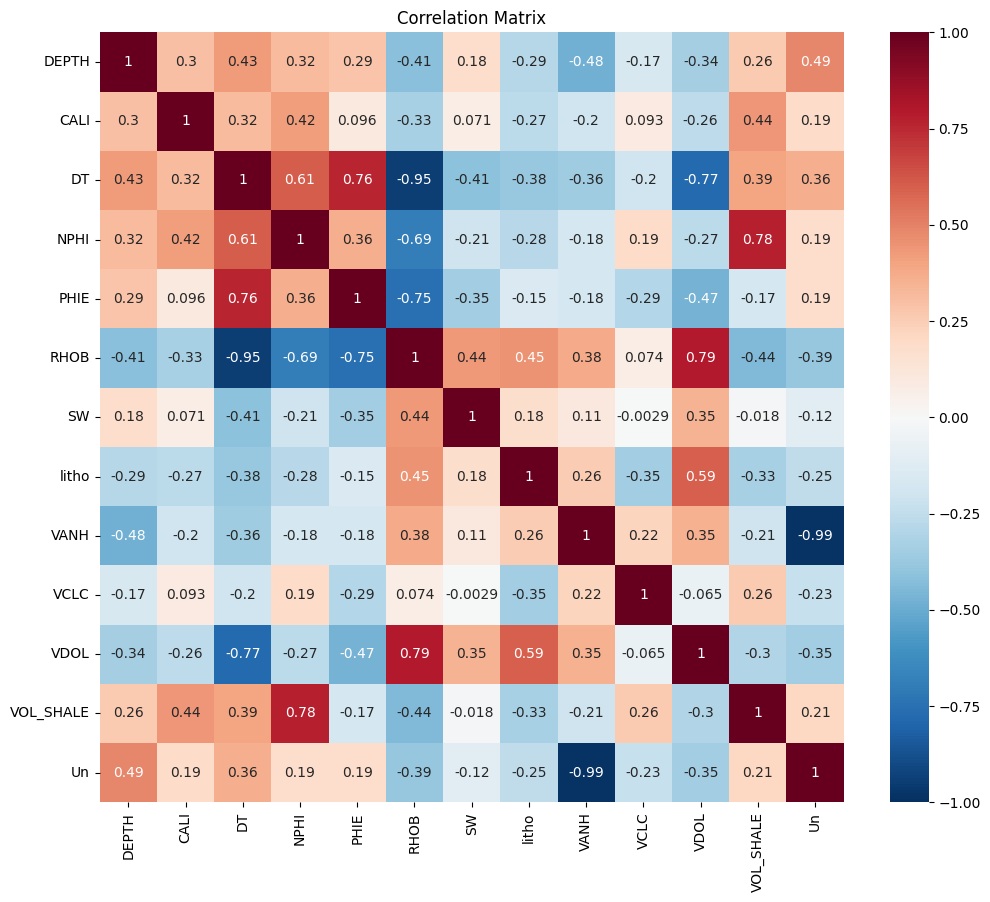

In [5]:
# محاسبه ماتریس همبستگی
corr_matrix = df.corr()

# رسم نمودار همبستگی
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


In [6]:
from sklearn.linear_model import LinearRegression

# محاسبه ماتریس همبستگی
corr_matrix = df.corr()

# بررسی ضرایب همبستگی در هر ستون
for col in df.columns:
    print(f"Correlation coefficients for column '{col}':")
    print(corr_matrix[col])
    print()

# محاسبه مجموع ضرایب همبستگی در هر ستون
col_sums = corr_matrix.abs().sum()
print("Sum of absolute correlation coefficients:")
print(col_sums)
print()

# بررسی ضریب تعیین (R-squared)
best_r2 = 0
best_col = None
for col in df.columns:
    X = df.drop(col, axis=1)
    y = df[col]
    model = LinearRegression()
    model.fit(X, y)
    r2 = model.score(X, y)
    if r2 > best_r2:
        best_r2 = r2
        best_col = col
print(f"Best column for prediction: '{best_col}' (R-squared: {best_r2:.2f})")


Correlation coefficients for column 'DEPTH':
DEPTH        1.000000
CALI         0.300614
DT           0.428258
NPHI         0.315640
PHIE         0.288568
RHOB        -0.414792
SW           0.182482
litho       -0.288625
VANH        -0.480034
VCLC        -0.166694
VDOL        -0.343369
VOL_SHALE    0.263953
Un           0.485698
Name: DEPTH, dtype: float64

Correlation coefficients for column 'CALI':
DEPTH        0.300614
CALI         1.000000
DT           0.316225
NPHI         0.417002
PHIE         0.096283
RHOB        -0.332631
SW           0.071434
litho       -0.267696
VANH        -0.195834
VCLC         0.092919
VDOL        -0.259932
VOL_SHALE    0.440007
Un           0.191959
Name: CALI, dtype: float64

Correlation coefficients for column 'DT':
DEPTH        0.428258
CALI         0.316225
DT           1.000000
NPHI         0.607707
PHIE         0.759137
RHOB        -0.950724
SW          -0.408957
litho       -0.381831
VANH        -0.357568
VCLC        -0.198309
VDOL        -0.77359